## ΑΣΚΗΣΗ 2).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Reading a CSV file into a pandas DataFrame
df = pd.read_csv("../data/video_games_2004-2010.csv")
df.head()
# This file analyzes only the dataset in the file video_games_2004-2010.csv !!!

# Quick Description of the dataset: Where did it come from and how many cases are there?
print("Dataset info: \n Source: https://corgis-edu.github.io/corgis/csv/video_games/\n Release Date: 21 May 2015\n Date of data production: Jan 2013\n Publisher: University of Portsmouth\n Number of records: ", df.shape[0])
print()
print("See more info about the dataset by clicking this link: https://researchportal.port.ac.uk/en/publications/what-makes-a-blockbuster-video-game-an-empirical-analysis-of-us-s")
print("To download the dataset click this link: https://researchportal.port.ac.uk/files/2366486/Managerial_and_Decision_Economics_2013_Video_Games_Dataset.csv")

Dataset info: 
 Source: https://corgis-edu.github.io/corgis/csv/video_games/
 Release Date: 21 May 2015
 Date of data production: Jan 2013
 Publisher: University of Portsmouth
 Number of records:  1212

See more info about the dataset by clicking this link: https://researchportal.port.ac.uk/en/publications/what-makes-a-blockbuster-video-game-an-empirical-analysis-of-us-s
To download the dataset click this link: https://researchportal.port.ac.uk/files/2366486/Managerial_and_Decision_Economics_2013_Video_Games_Dataset.csv


In [5]:
# Dropping unnecessary columns
print("Dropping unnecessary columns...")
df.drop(columns=['Length.All PlayStyles.Average',
       'Length.All PlayStyles.Leisure', 'Length.All PlayStyles.Median', 'Length.All PlayStyles.Polled', 'Length.All PlayStyles.Rushed',
       'Length.Completionists.Average', 'Length.Completionists.Leisure', 'Length.Completionists.Median', 'Length.Completionists.Polled',
       'Length.Completionists.Rushed', 'Length.Main + Extras.Average', 'Length.Main + Extras.Leisure', 'Length.Main + Extras.Median',
       'Length.Main + Extras.Polled', 'Length.Main + Extras.Rushed', 'Length.Main Story.Average', 'Length.Main Story.Leisure',
       'Length.Main Story.Median', 'Length.Main Story.Polled', 'Length.Main Story.Rushed'], inplace=True)

# Check for missing values
print("Number of Missing Values in each column: ")
print(df.isna().sum())

#Drop the column Features.Publishers because it has a lot of missing values and it is not significant to the analysis
df.drop(columns=['Metadata.Publishers'], inplace=True)

# Convert the data type of the "Release.Year" column to int64
df['Release.Year'] = df['Release.Year'].astype('int64')

Dropping unnecessary columns...
Number of Missing Values in each column: 
Title                        0
Features.Handheld?           0
Features.Max Players         0
Features.Multiplatform?      0
Features.Online?             0
Metadata.Genres              0
Metadata.Licensed?           0
Metadata.Publishers        264
Metadata.Sequel?             0
Metrics.Review Score         0
Metrics.Sales                0
Metrics.Used Price           0
Release.Console              0
Release.Rating               0
Release.Re-release?          0
Release.Year                 0
dtype: int64


In [6]:
print("The dataset has the following variables:")
print(df.dtypes)

The dataset has the following variables:
Title                       object
Features.Handheld?            bool
Features.Max Players         int64
Features.Multiplatform?       bool
Features.Online?              bool
Metadata.Genres             object
Metadata.Licensed?            bool
Metadata.Sequel?              bool
Metrics.Review Score         int64
Metrics.Sales              float64
Metrics.Used Price         float64
Release.Console             object
Release.Rating              object
Release.Re-release?           bool
Release.Year                 int64
dtype: object


In [9]:
def plot_var_distr(var, threshold=20, unit=None):

    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 5), dpi=200)
    
    # Generate axis label and title with unit, if provided
    xlabel = f"{var} ({unit})" if unit else var
    title = f"Distribution of {var} ({unit})" if unit else f"Distribution of {var}"
    
    # Check if the variable is categorical
    if df[var].dtype == 'object':
    
        # Count the frequency of each category
        value_counts = df[var].value_counts()
        
        # Aggregate less frequent categories into 'Others'
        aggregated_counts = value_counts[value_counts >= threshold]
        aggregated_counts['Others'] = value_counts[value_counts < threshold].sum()
 
        sns.barplot(x=aggregated_counts.index, y=aggregated_counts.values)
        plt.xticks(rotation=90)
        
    else:
        sns.displot(df[var], bins=20)
     
    if var == 'Release.Year':
    # Format x-axis labels as integers
        years = df[var].unique()
        plt.xticks(years, [str(int(year)) for year in years])
        
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

<Figure size 2000x1000 with 0 Axes>

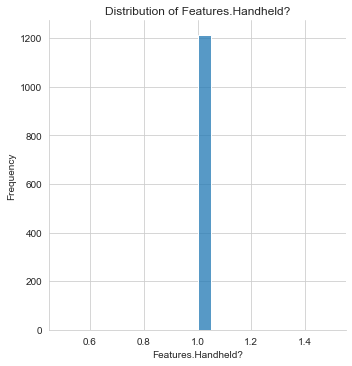

<Figure size 2000x1000 with 0 Axes>

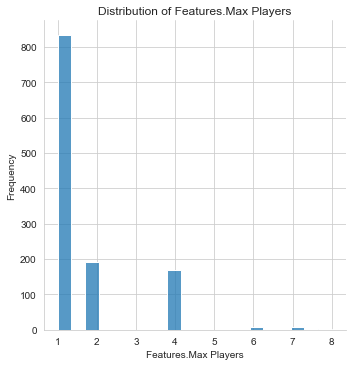

<Figure size 2000x1000 with 0 Axes>

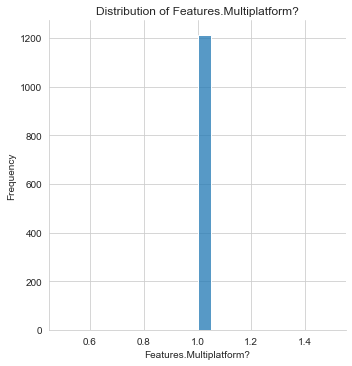

<Figure size 2000x1000 with 0 Axes>

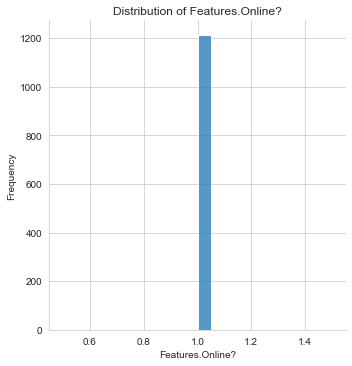

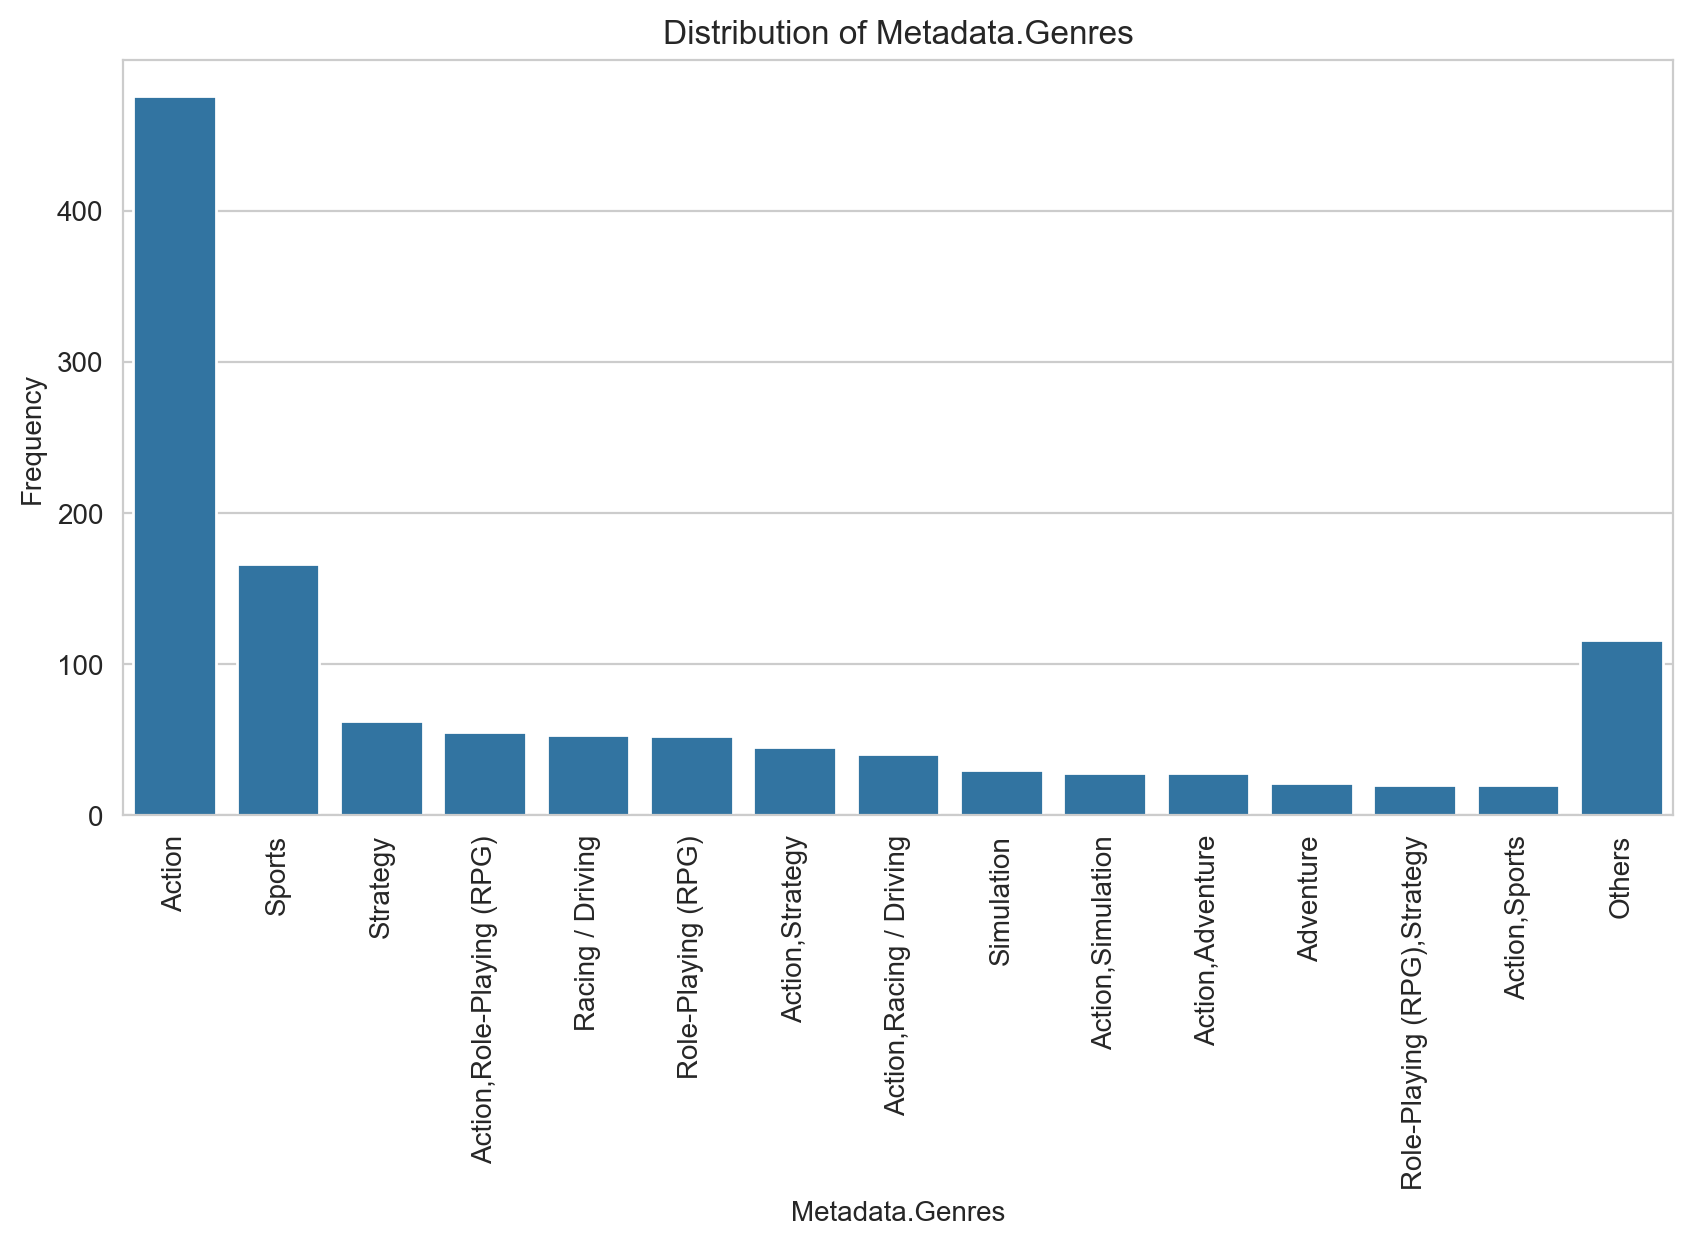

<Figure size 2000x1000 with 0 Axes>

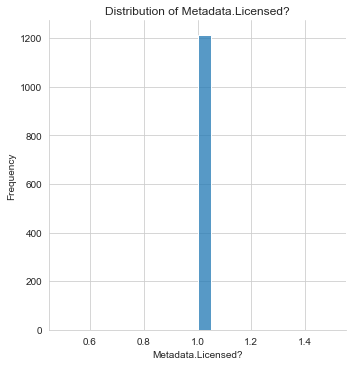

<Figure size 2000x1000 with 0 Axes>

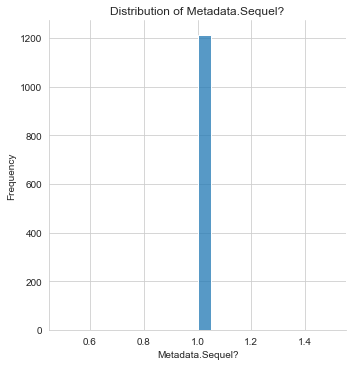

<Figure size 2000x1000 with 0 Axes>

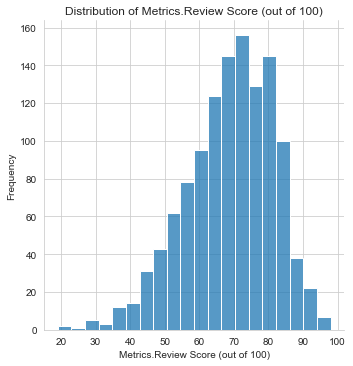

<Figure size 2000x1000 with 0 Axes>

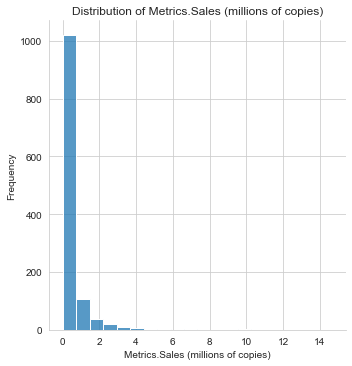

<Figure size 2000x1000 with 0 Axes>

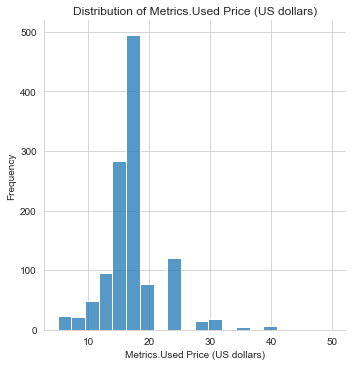

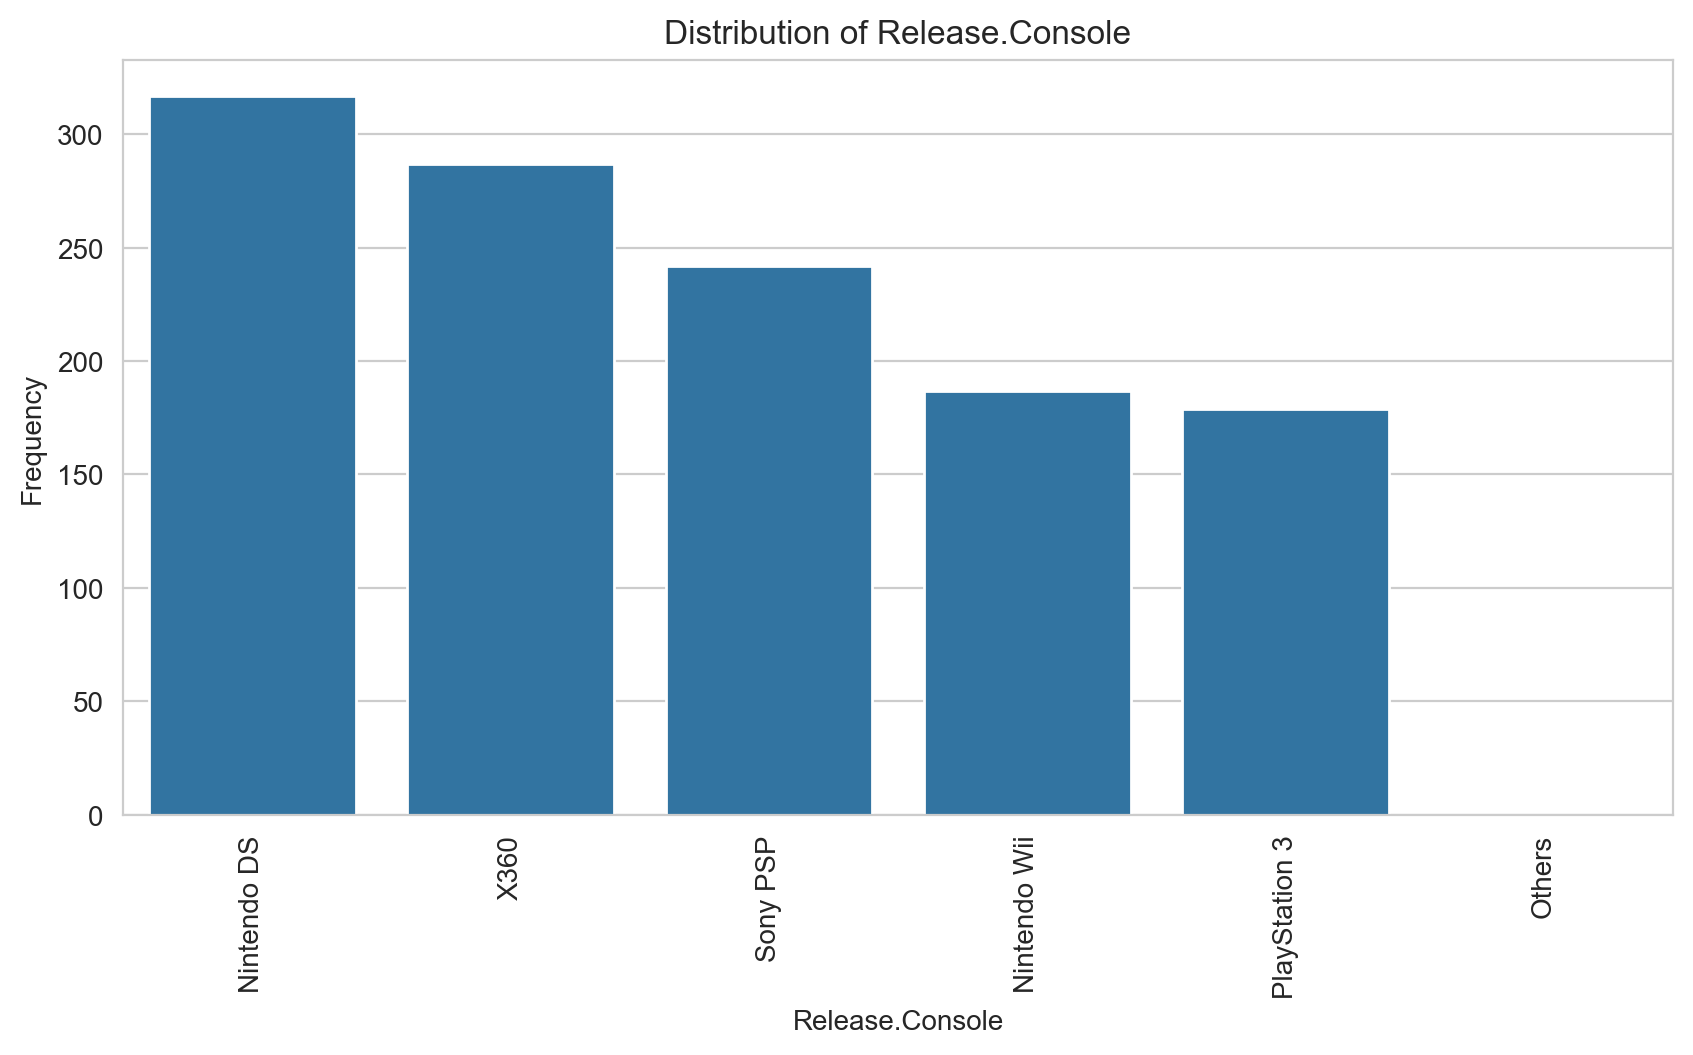

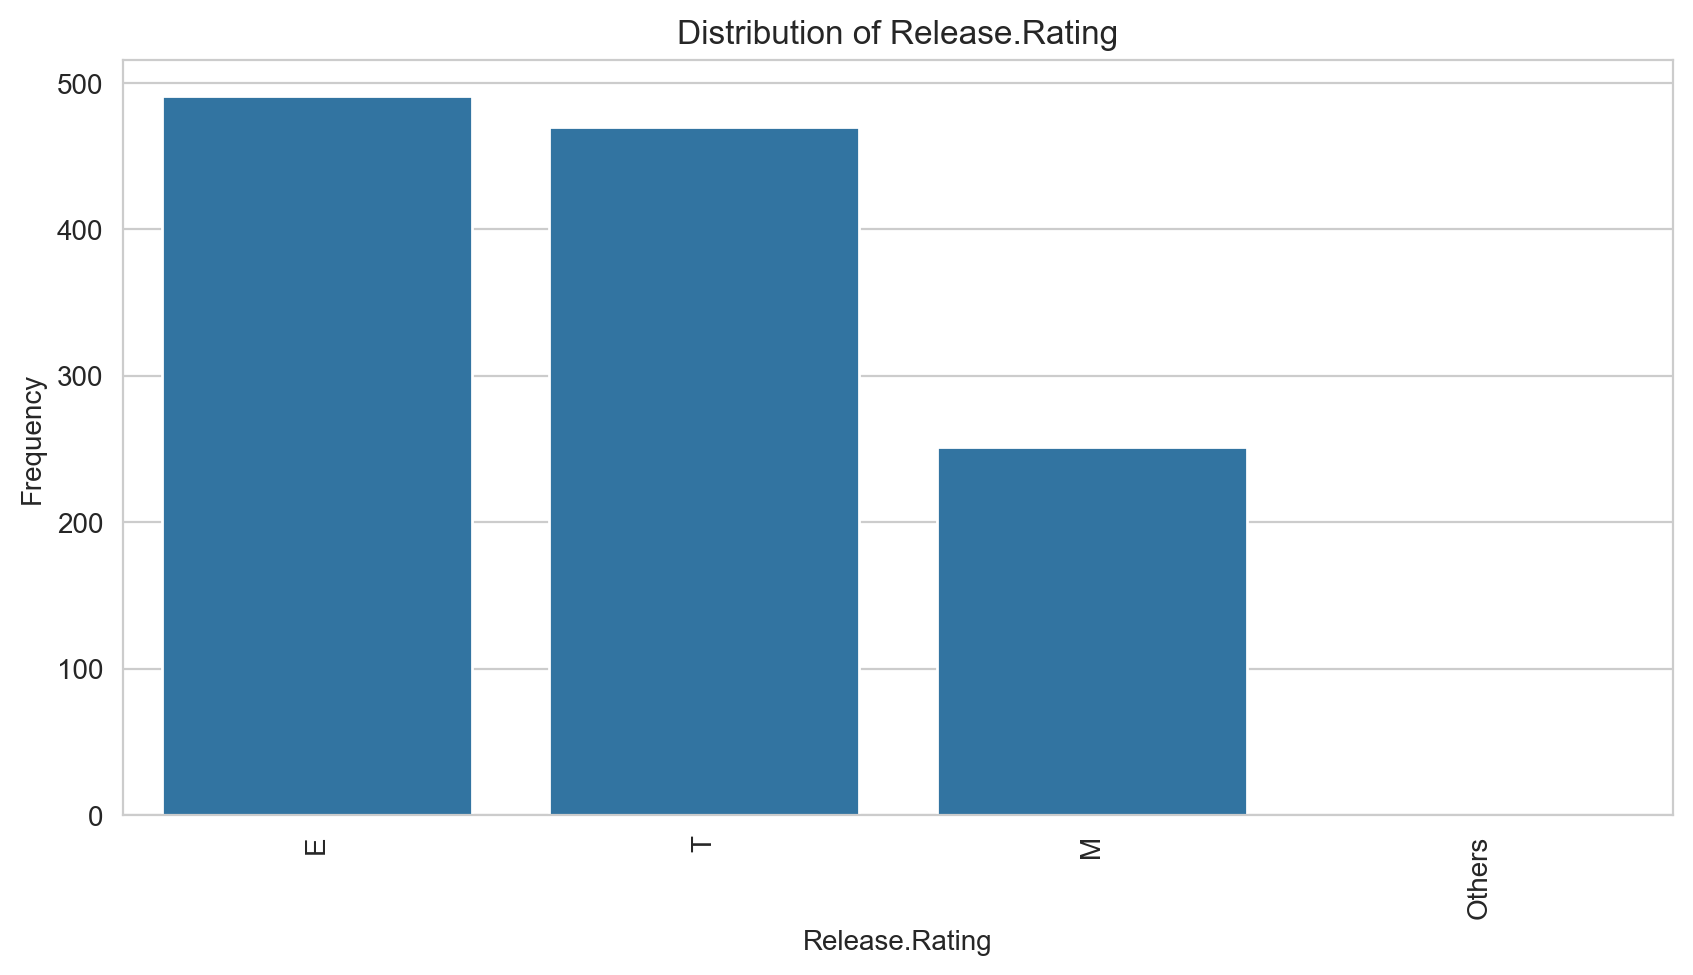

<Figure size 2000x1000 with 0 Axes>

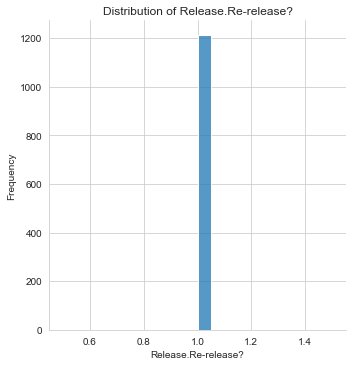

<Figure size 2000x1000 with 0 Axes>

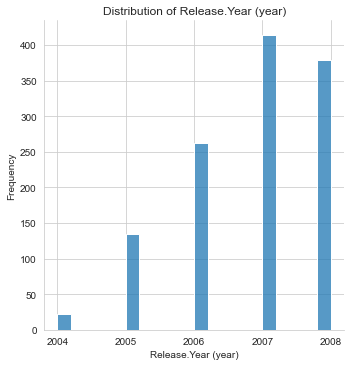

In [10]:
for var in df.columns[1::]: # Skip the first column, which is the title of the game.
    if var == 'Release.Year':
        plot_var_distr(var, unit='year')
    elif var == 'Metrics.Sales':
        plot_var_distr(var, unit='millions of copies')
    elif var == 'Metrics.Review Score':
        plot_var_distr(var, unit='out of 100')
    elif var == 'Metrics.Used Price':
        plot_var_distr(var, unit='US dollars')
    elif var == 'Metrics.Played':
        plot_var_distr(var, unit='hours')
    else:
        plot_var_distr(var)

In [12]:
# Group all the numerical variables in a list and print them
numerical_vars = [var for var in df.columns if df[var].dtype != 'object' and df[var].dtype != 'bool']
print('Numerical variables: \n', numerical_vars)
print("#########################################")

# For every numerical variable, calculate the average value, the standard deviation and the 5-number summary
for var in numerical_vars:
    print(var, 'Average: ', df[var].mean())
    print(var, 'Standard Deviation: ', df[var].std())
    print("---------------------------------------------")
    print(var, '5-number summary: ')
    desc = df[var].describe() # describe() returns a DataFrame with the 5-number summary and the mean and the std.
    print(desc[['min', '25%', '50%', '75%', 'max']]) # I exclude the mean and the std.
    print("#########################################")

Numerical variables: 
 ['Features.Max Players', 'Metrics.Review Score', 'Metrics.Sales', 'Metrics.Used Price', 'Release.Year']
#########################################
Features.Max Players Average:  1.6584158415841583
Features.Max Players Standard Deviation:  1.2043768783413566
---------------------------------------------
Features.Max Players 5-number summary: 
min    1.0
25%    1.0
50%    1.0
75%    2.0
max    8.0
Name: Features.Max Players, dtype: float64
#########################################
Metrics.Review Score Average:  68.82838283828383
Metrics.Review Score Standard Deviation:  12.956265876347192
---------------------------------------------
Metrics.Review Score 5-number summary: 
min    19.0
25%    60.0
50%    70.0
75%    79.0
max    98.0
Name: Metrics.Review Score, dtype: float64
#########################################
Metrics.Sales Average:  0.5031600660066006
Metrics.Sales Standard Deviation:  1.069850154640039
---------------------------------------------
Metrics.Sal

Features.Max Players Average:  1.720464135021097

Features.Max Players Standard Deviation:  1.2639602685552929

- Features.Max Players 5-number summary: 
  
| min  =  1.0 |

| 25%  =  1.0 |

| 50%  =  1.0 |

| 75%  =  2.0 |

| max  =  8.0 |
  
Name: Features.Max Players, dtype: float64
- - - - - - -
Metrics.Review Score Average:  69.68143459915612

Metrics.Review Score Standard Deviation:  12.739357454423628

- Metrics.Review Score 5-number summary: 
  
| min  = 25.00 |

| 25%  = 61.75 |

| 50%  = 71.00 |

| 75%  = 80.00 |

| max  = 98.00 |

Name: Metrics.Review Score, dtype: float64
- - - - - - -
Metrics.Sales Average:  0.5620991561181434

Metrics.Sales Standard Deviation:  1.1736861142138202

- Metrics.Sales 5-number summary: 

| min  =  0.01 |

| 25%  =  0.11 |

| 50%  =  0.25 |

| 75%  =  0.50 |

| max  = 14.66 |

Name: Metrics.Sales, dtype: float64
- - - - - - -
Metrics.Used Price Average:  17.335021097046408

Metrics.Used Price Standard Deviation:  5.182464473041564

- Metrics.Used Price 5-number summary: 

| min  =  4.95 |

| 25%  = 14.95 |

| 50%  = 16.95 |

| 75%  = 17.95 |

| max  = 49.95 |

Name: Metrics.Used Price, dtype: float64
- - - - - - -
Release.Year Average:  2006.746835443038

Release.Year Standard Deviation:  1.0595971153273522

- Release.Year 5-number summary: 

| min  = 2004 |

| 25%  = 2006 |

| 50%  = 2007 |

| 75%  = 2008 |
 
| max  = 2008 |

Name: Release.Year, dtype: int64
- - - - - - -

Let's review each variable and decide which descriptive statistics are more suitable:

1. **Features.Max Players**:
   - **Preferred Description**: 5-number summary.
   - **Reason**: The data is right-skewed, with a maximum value (8) that is much higher than the 75th percentile (2), indicating that most data points are low with some high outliers.

2. **Metrics.Review Score**:
   - **Preferred Description**: Both could be informative, but the 5-number summary provides more insight into the distribution.
   - **Reason**: The 5-number summary indicates a potential left-skew as the median (71) is higher than the mean (69.68), and the range is quite broad (from 25 to 98).

3. **Metrics.Sales**:
   - **Preferred Description**: 5-number summary.
   - **Reason**: The data is heavily right-skewed, with a mean that is less indicative of the central tendency due to the presence of high-value outliers (max of 14.66 vs. a 75th percentile of 0.50).

4. **Metrics.Used Price**:
   - **Preferred Description**: 5-number summary.
   - **Reason**: The 5-number summary indicates that while most of the data clusters around a lower price, there is a wide range of prices up to $49.95, which might not be apparent with just the mean and standard deviation.

5. **Release.Year**:
   - **Preferred Description**: Average and Standard Deviation.
   - **Reason**: The years are within a tight range and likely have a uniform or normal distribution, so the mean and standard deviation are adequate to describe the central tendency and dispersion.

In summary, the 5-number summary is better for variables with skewed distributions or when there are significant outliers. The mean and standard deviation are more appropriate for variables with a more symmetrical distribution.

In [13]:
def plot_association(var1, var2, df, type='num', unit1=None, unit2=None):
    
    if type=='num': # If the variables are numerical, plot a scatterplot
        plt.figure(figsize=(10, 6), dpi=200)
        sns.scatterplot(x= df[var1], y= df[var2], data= df, marker='+' ,color='green')
        
    elif type=='cat': # If the variables are categorical, plot a boxplot
        plt.figure(figsize=(15, 8), dpi=200)
        sns.boxplot(x= df[var1], y= df[var2], data= df)
        
    plt.title(f"Association between {var1} and {var2}")
    plt.xlabel(f"{var1} ({unit1})" if unit1 else var1)
    plt.ylabel(f"{var2} ({unit2})" if unit2 else var2)
    plt.show()

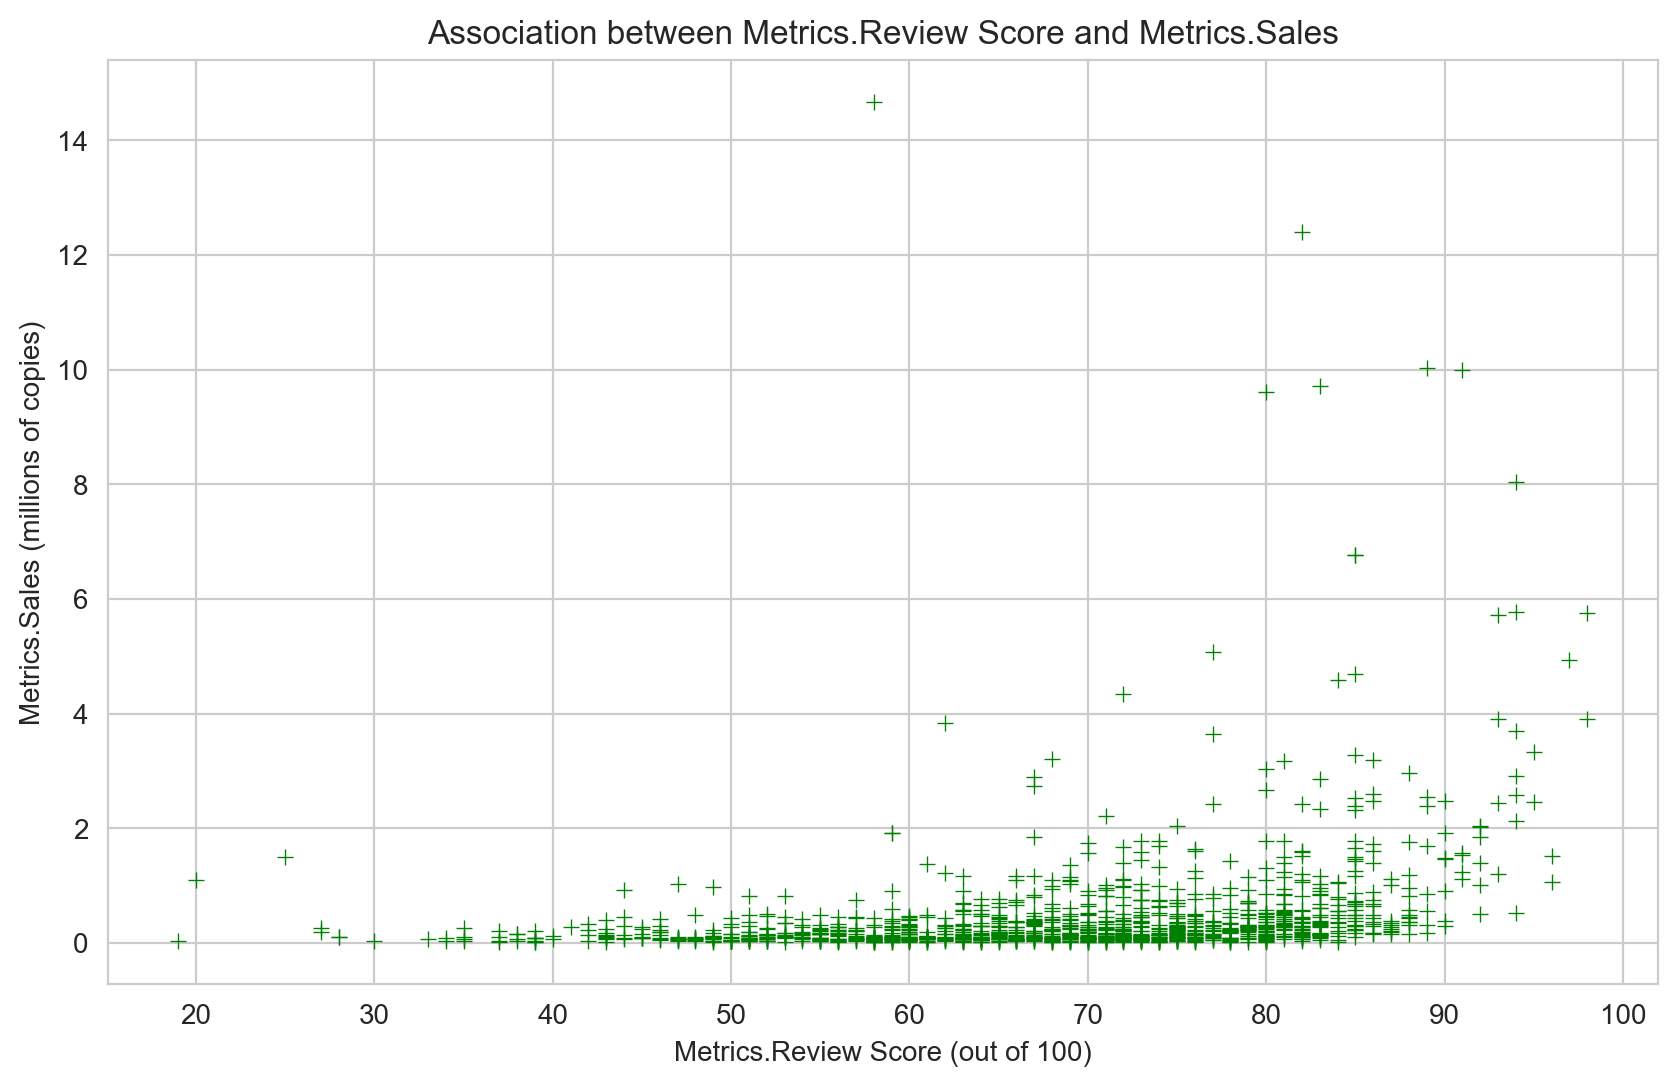

In [14]:
# Explore the association between 'Metrics.Review Score' and 'Metrics.Sales'
plot_association('Metrics.Review Score', 'Metrics.Sales', df, unit1='out of 100', unit2='millions of copies')

### Συμπέρασμα από το παραπάνω γράφημα

Στο παραπάνω scatterplot παρατηρούμε ότι στο εύρος των σκορ από 70 έως 90 το πλήθος των σημείων είναι μεγάλο με το γράφημα να γίνεται εμφανέστατα πιο πυκνό.
Αυτό υποδηλώνει τα εξής:
* Τα περισσότερα βιντεοπαιχνίδια με υψηλές κριτικές (εύρος 70% με 100%) τείνουν να πουλάνε έως και 2 εκατομμύρια αντίγραφα, με λίγες εξαιρέσεις να φτάνουν ακόμη υψηλότερα νούμερα.
  
* Παρατηρούμε ότι το δείγμα μας δεν περιέχει πολλά βιντεοπαιχνίδια με χαμηλές κριτικές (κάτω από 30%) ή ότι γενικά δεν είναι συχνό φαινόμενο να υπάρχουν βιντεοπαιχνίδια με χαμηλές κριτικές. Η προσωπική μου εμπειρία όμως, με κάνει να συγκλίνω προς το πρώτο ενδεχόμενο ως την κύρια αιτία.
  
* Παρατηρούμε ότι ασχέτως με την κριτική του, ένα βιντεοπαιχνίδι κατά κύριο λόγο δεν θα πουλήσει πάνω από 2 εκατομμύρια αντίγραφα. Προφανώς και υπάρχουν, λίγες βέβαια, εξαιρέσεις παιχνιδιών  που έχουν πουλήσει έως και 10 εκατομμύρια αντίγραφα με κριτική 80%.
  
* Δεν μπορούμε να διακρίνουμε κάποια ξεκάθαρη συσχέτιση μεταξύ των πωλήσεων και των κριτικών των βιντεοπαιχνιδιών. Δηλαδή, βιντεοπαιχνίδια με υψηλές κριτικές δεν υπόσχονται απαραίτητα και υψηλό αριθμό πωλήσεων.




_ΑΛΛΟ ΓΡΑΦΗΜΑ ΣΥΣΧΤΕΤΙΣΗΣ ΜΕΤΑΞΥ ΔΙΑΦΟΡΕΤΙΚΩΝ ΜΕΤΑΒΛΗΤΩΝ ΑΠΟ ΟΤΙ ΠΡΟΗΓΟΥΜΕΝΩΣ_

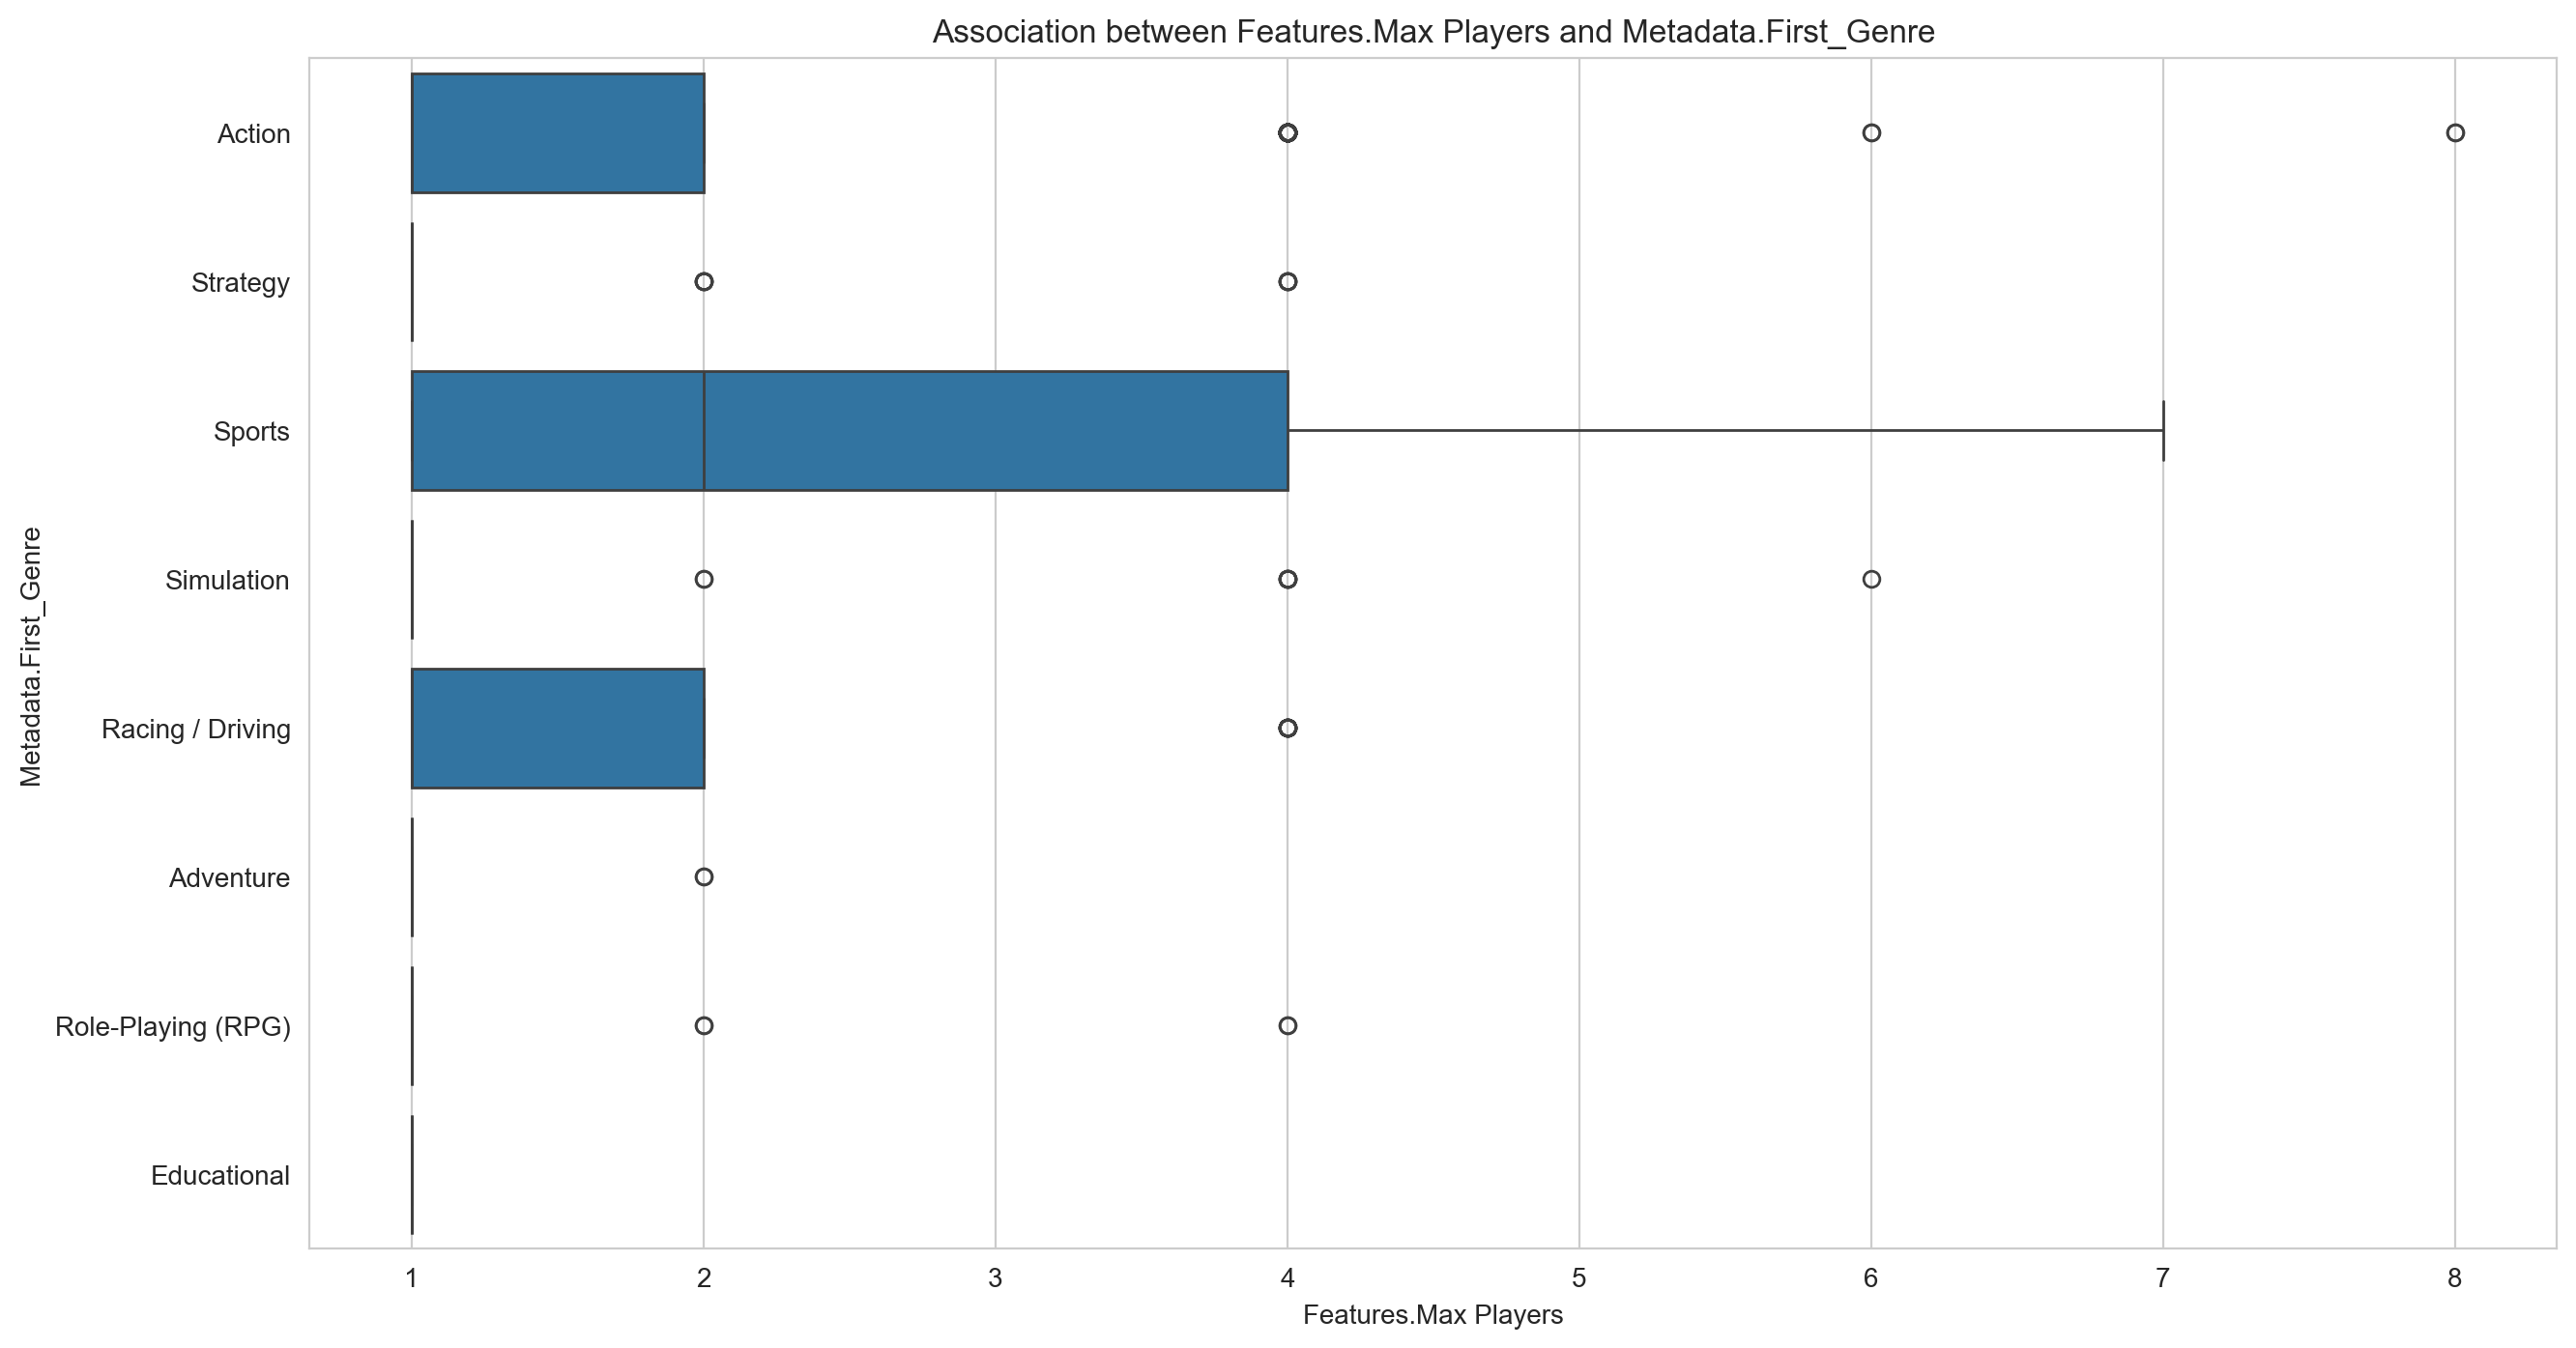

In [15]:
# Plot the association between 'Metadata.Genre' and 'Features.Max Players'
df['Metadata.First_Genre'] = df['Metadata.Genres'].str.split(',').str[0] # Extract the first genre from the 'Metadata.Genres' column
plot_association('Features.Max Players', 'Metadata.First_Genre', df, type='cat')
df.drop(columns=['Metadata.First_Genre'], inplace=True)